# Generator functions

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2019 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [3]:
%matplotlib inline

import networkx as nx
import numpy as np

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

**Exercise:** In  the  book  I  wrote  a  version  of `random_pairs` that  violates  Ned’s  recommendation  to “abstract your iteration”:

In [4]:
def flip(p):
    return np.random.random() < p

In [5]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

In [6]:
def random_pairs(nodes, p):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j and flip(p):
                yield u, v

In [7]:
nodes = range(4)

In [8]:
for pair in all_pairs(nodes):
    print(pair)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [9]:
for pair in random_pairs(nodes, 0.5):
    print(pair)

(0, 1)
(1, 3)


Write a better version of this function that *uses* `all_pairs` rather than copying and modifying it.

In [10]:
# Solution goes here
def random_pairs(nodes, p):
    for x in all_pairs(nodes):
        if flip(p):
            yield x

In [18]:
for pair in random_pairs(nodes, 0.5):
    print(pair)

(0, 2)
(1, 2)
(1, 3)
(2, 3)


**Exercise:**  Write a function called `random_tree` that takes a number of nodes, `n`, as a parameter and builds an undirected graph by starting with a single node, adding one node at a time, and connecting each new node to one existing node. You can use any of the functions in Python’s `random` module.

In [82]:
# Solution goes here
import random
def make_random_tree(n):
    G = nx.Graph()
    if n == 0:
        return G
    
    G.add_node(0)
    for x in range(1, n):
        rand_other = random.randint(0, x-1)
        G.add_edge(x, rand_other)
    return G

In [83]:
tree = make_random_tree(10)
tree.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

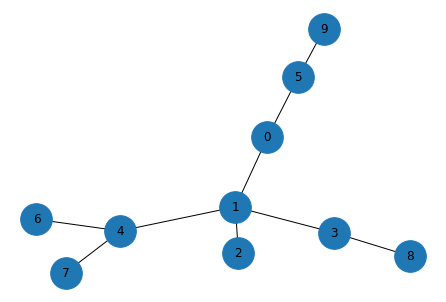

In [84]:
nx.draw(tree, 
        node_color='C0', 
        node_size=1000, 
        with_labels=True)

**Bonus:** Read the various equivalent definitions of tree and then write a function called `is_tree` that takes a graph and returns `True` if the graph is a tree.

In [95]:
def is_tree(G):
    if not nx.is_connected(G):
        return False
    
    n = nx.number_of_nodes(G)
    m = nx.number_of_edges(G)
    
    return m == n-1
    
#     visited = set()
#     all_nodes = G.nodes()
#     print(all_nodes)
#     print(all_nodes[0])
#     visited = [all_nodes[0]]
#     neighs = G.neighbors(all_nodes[0])
#     print(neighs)
#     tovisit = None
#     while tovisit:
#         curr = tovisit.pop()
#         for y in G.neighbors(curr):
#             if y in visited:
#                 return False
#             else:
#                 tovisit.add(y)
#     return True
            
print(is_tree(tree))

True


**Exercise:** Write a function called `all_triangles` that takes an undirected graph as a parameter and returns all triangles, where a triangle is a collection of three nodes that are connected to each other (regardless of whether they are also connected to other nodes). Your solution can be an ordinary function that returns a list of tuples, or a generator function that yields tuples.  It does not have to be particularly efficient. It’s OK if your solution finds the same triangle more than once, but as a bonus challenge, write a solution that avoids it.

In [112]:
# Solution goes here
def all_triangles(G):
    all_triang = set()
    for x in G.edges():
        for y in set(G.neighbors(x[1])) & set(G.neighbors(x[0])): 
            tup = tuple(sorted((x[0], x[1], y))) 
            if (tup not in all_triang):
                all_triang.add(tup)
                yield tup

In [14]:
# Solution goes here

In [27]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

In [67]:
complete = make_complete_graph(4)
complete.nodes()

NodeView((0, 1, 2, 3))

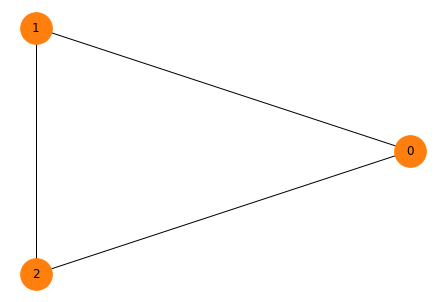

In [29]:
nx.draw_circular(complete, 
                 node_color='C1', 
                 node_size=1000, 
                 with_labels=True)

In [113]:
for tri in all_triangles(complete):
    print(tri)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


In [66]:
for tri in all_triangles(tree):
    print(tri)

In [9]:
def rolling_sum(t,k):
    final_sum = []
    for x in range(len(t)-k + 1):
        temp_sum = 0
        for y in range(x, x+k):
            temp_sum += t[y]
        final_sum.append(temp_sum)
        
    return final_sum

temp = [1, 2, 3, 4, 5]
k = 3
print(rolling_sum(temp,k))

[6, 9, 12]


In [ ]:
def cross_edges(G,top):
    
